# Proyecto Final Mineria de Datos

## Exploración de los datos

## Importamos las librerias que ocuparemos

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
# python -m pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns
import math
#python -m pip install squarify
import squarify

## Importamos el archivo que ocuparemos

In [2]:
path = 'appstore_games.csv'
df = pd.read_csv(path)

# Exploración del dataset

In [3]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
df.tail()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019
17006,https://apps.apple.com/us/app/the-three-kingdo...,1475076711,The Three Kingdoms :Bomb,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,The protagonist uses the method of placing a b...,ming bo tang,4+,"EN, ZH",22952960.0,Games,"Games, Strategy, Puzzle",2/08/2019,2/08/2019


In [5]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [7]:
df.columns.values.tolist()

['URL',
 'ID',
 'Name',
 'Subtitle',
 'Icon URL',
 'Average User Rating',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Description',
 'Developer',
 'Age Rating',
 'Languages',
 'Size',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date']

In [8]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

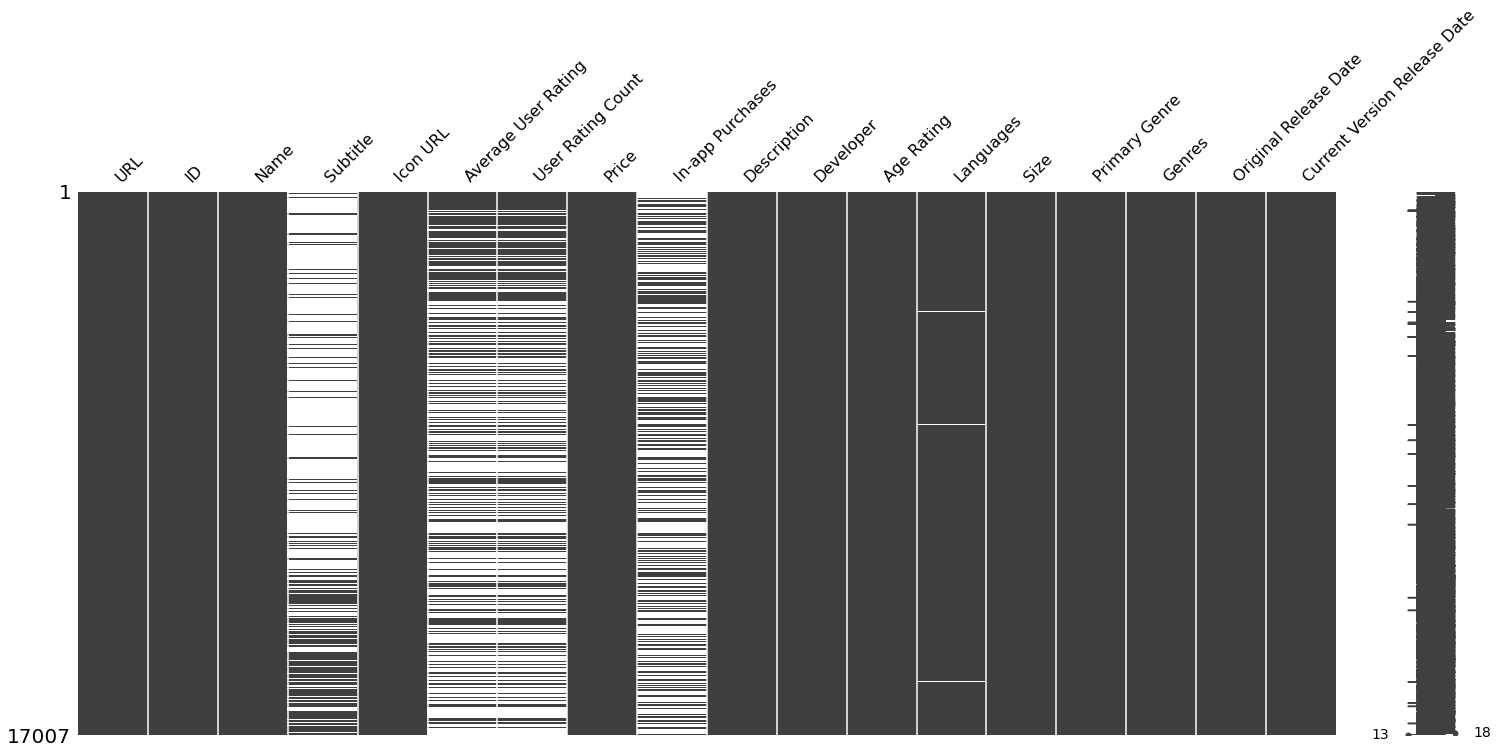

In [9]:
msno.matrix(df)

In [10]:
df.columns[df.isnull().any()].tolist()

['Subtitle',
 'Average User Rating',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Languages',
 'Size']

In [11]:
df.agg(['count', 'size', 'nunique'])

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,17007,5261,17007,7561,7561,16983,7683,17007,17007,17007,16947,17006,17007,17007,17007,17007
size,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007,17007
nunique,16847,16847,16847,5010,16847,9,1792,24,3803,16473,8693,4,990,15794,21,1004,3084,2512


Como el URL y el ID no representa ningun valor para este analizis nos desaremos de esas columnas.

In [12]:
df.drop(['Icon URL', 'ID'], axis = 1, inplace = True)

In [13]:
df

,URL,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,EachOther,NaN,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,Rabbit Vs Tortoise,NaN,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,FaTaLL,Most fun game!!!,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


## Análisis de titulos y subtitulos

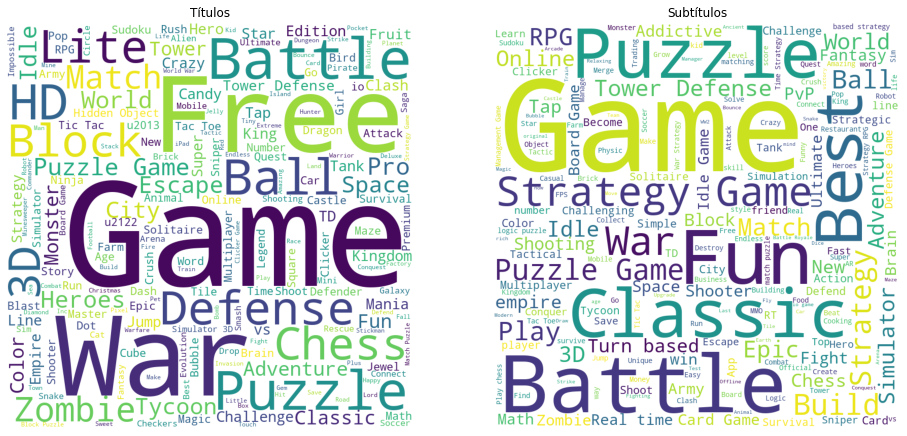

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Títulos')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Subtítulos')
plt.show()

Podemos ve que hay mas aplicaciones de juegos, un gran numero de las aplicaciones son gratis, y de las tematicas que mas hay son de guerras/batallas y rompecabezas.

## Análisis del Average User Rating

In [15]:
df['Average User Rating'].unique()

array([4. , 3.5, 3. , 2.5, nan, 2. , 4.5, 1.5, 5. , 1. ])

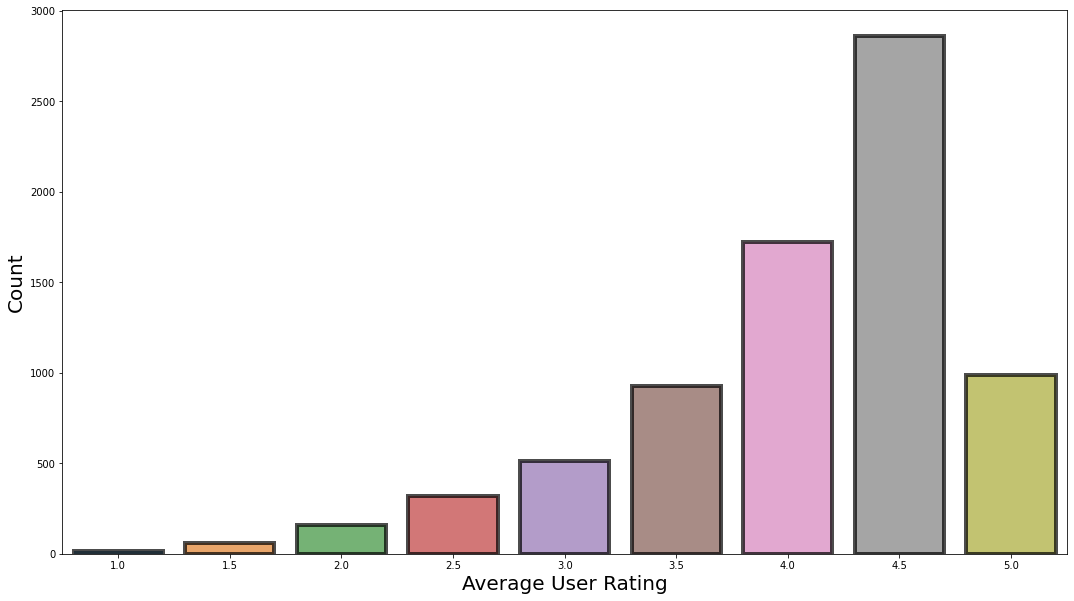

In [16]:
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.countplot(data = df, x ='Average User Rating', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Average User Rating', fontsize = 20)
plt.show()

Observamos que la calificación mas recibida por las aplicaciones es de 4.5

## Análisis del User Rating Count

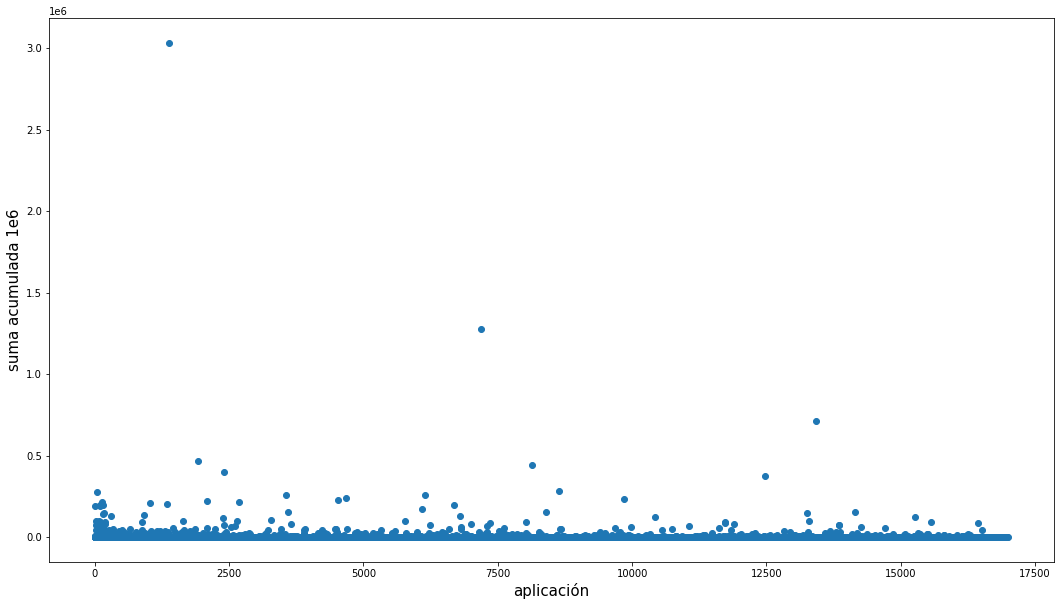

In [17]:
y = df['User Rating Count']
x = np.arange(1,df.shape[0]+1,1)
plt.plot(x, y, 'o')
plt.xlabel('aplicación', fontsize = 15)
plt.ylabel('suma acumulada 1e6', fontsize = 15)
plt.show()

Podemos observar que la mayoria de las aplicaciones se encuentran en una suma acumulada de calificaciones entre 0 y 5000000

## Análisis del precio de las aplicaciones

In [18]:
p = df['Price']
precio =[]
apps_paga=[]
for i in p:
    if i>0:
        precio.append('Si')
        apps_paga.append(i)
    else:
        precio.append('No')
precio = pd.DataFrame(precio)
precio.columns = ['precio']
apps_paga = pd.DataFrame(apps_paga)
apps_paga.columns = ['precio']

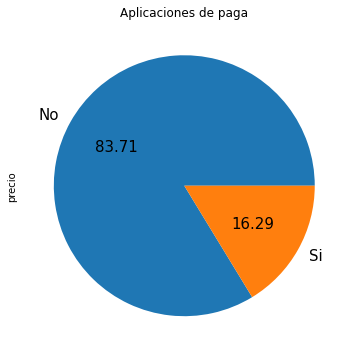

In [19]:
plot = precio['precio'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Aplicaciones de paga', fontsize = 15)

Vemos que el 83.71% de las aplicaciones no cuesta adquirirlas, mientras que el 16.29% si.

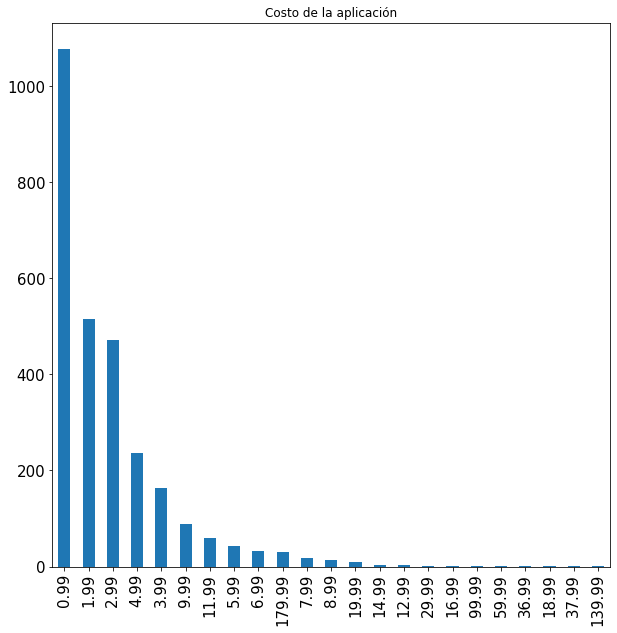

In [20]:
plot = apps_paga['precio'].value_counts().plot(kind='bar',  
                                            figsize=(10, 10),
                                            title='Costo de la aplicación', fontsize = 15)

De las aplicaciones que cuestan, la mayoria cobra casi 1 dolar.

## Analisis de las apps tienen pagos dentro de la aplicación

In [21]:
p = df['In-app Purchases']
p= p.dropna()
print(p.count())
p= pd.DataFrame(p)
p.columns = ['costos']
print(p['costos'].unique())

7683
['1.99' '0.99' '1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99' ...
 '0.99, 5.99, 12.99, 1.99, 79.99, 26.99' '1.99, 9.99, 4.99, 2.99, 0.99'
 '9.99, 49.99, 3.99']


De 17007 aplicaciones 7683 ofrecen compras dentro de la aplicación, es decir el 45.17% de las aplicaciones.
Y estas aplicaciones ofrecen compras con un valor de entre 1.99 y 3.99 dolares.

## Analisis de desarrolladores de apps 

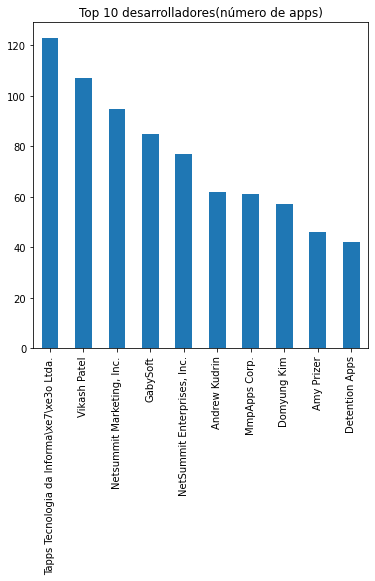

In [22]:
plot = df['Developer'].value_counts()[:10].plot(kind='bar', 
                                            figsize=(6, 6),
                                            title='Top 10 desarrolladores(número de apps)')

In [23]:
df['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    123
Vikash Patel                                  107
Netsummit Marketing, Inc.                      95
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
                                             ... 
Nordcurrent Group UAB                           1
Simplus Technologies Group, LLC                 1
Codeverse                                       1
Yuichi Sakashita                                1
Kadeem Allen                                    1
Name: Developer, Length: 8693, dtype: int64

In [24]:
len(df['Developer'].unique())

8693

En la gráfica anterior podemos ver que esos son los desarrolladores con mas aplicaciones publicadas.

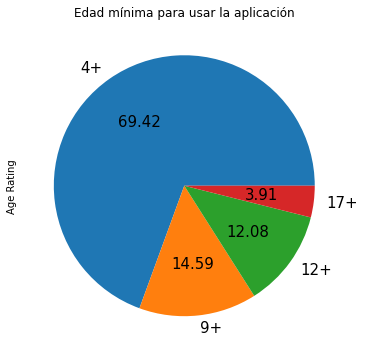

In [25]:
plot = df['Age Rating'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Edad mínima para usar la aplicación', fontsize = 15)

El 69% de las aplicaciones son aptas para niños de apartir de 4 años. Y solo un 3% piden tener al menos 17 años.

## Análisis de los lenguajes de las aplicaciones

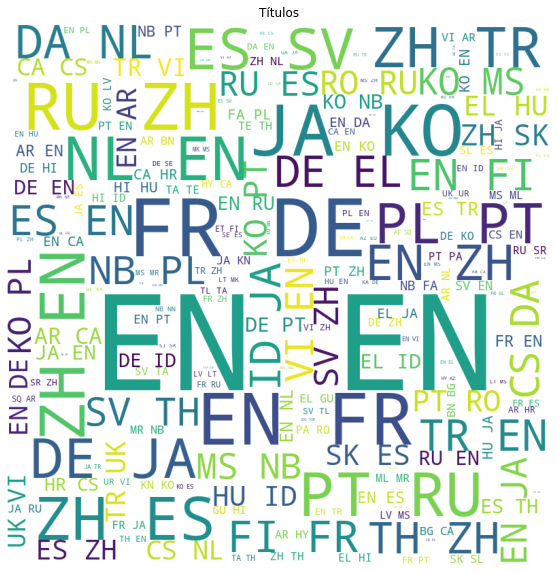

In [26]:
wordcloud= WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Languages'].dropna().astype(str)) )
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Títulos')
plt.show()

Podemos notar que los lenguajes que aparecen más y estan en un mayor tamaño son **EN**(inglés), **FR**(francés), **DE**(aleman), **JA**(japonés), **KO**(koreano), **ZH**(chino) y **ES**(español)

## Análisis del tamaño de las aplicaciones

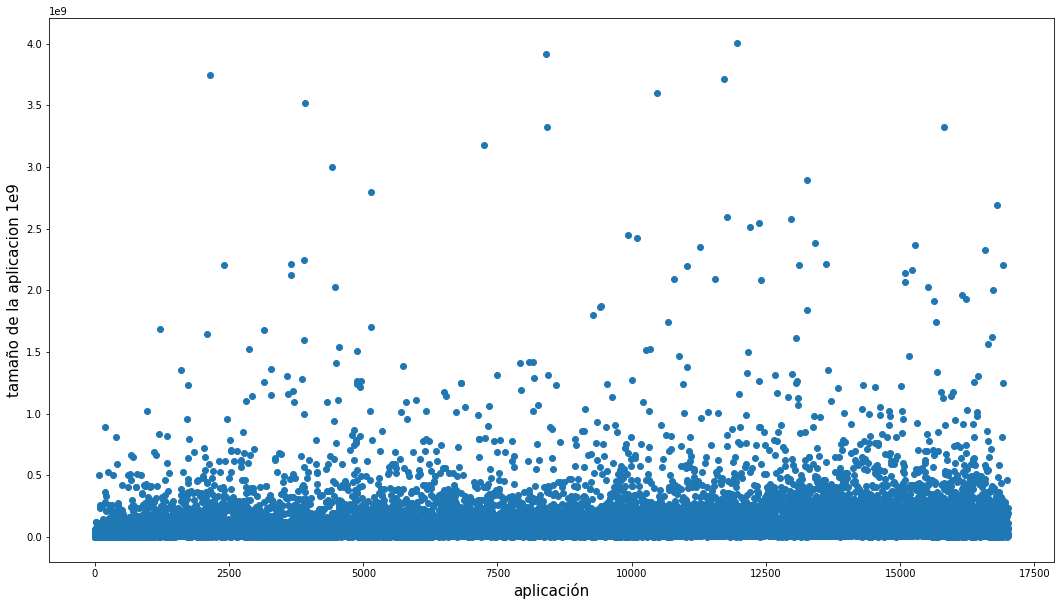

In [27]:
y = df['Size']
x = np.arange(1,df.shape[0]+1,1)
plt.plot(x, y, 'o')
plt.xlabel('aplicación', fontsize = 15)
plt.ylabel('tamaño de la aplicacion 1e9', fontsize = 15)
plt.show()

La mayoria de las aplicaciones tienen un tamaño de entre 0 y 500000000 bytes es decir 500MB

## Análisis del género de las aplicaciones

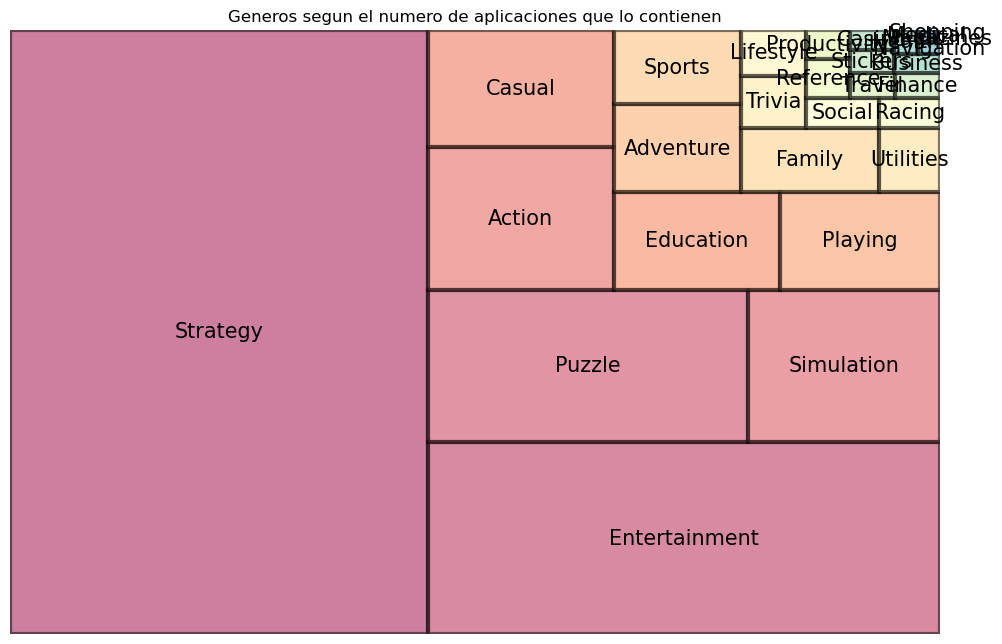

In [28]:
df['Genreslist'] = df['Genres'].str.extract('([A-Z]\w{5,})', expand=True)
temp_df = df['Genreslist'].value_counts().reset_index()
sizes=np.array(temp_df['Genreslist'])
labels=temp_df['index']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Generos segun el numero de aplicaciones que lo contienen', fontsize = 12)
plt.axis('off')
plt.show()


# Correlaciones entre variables

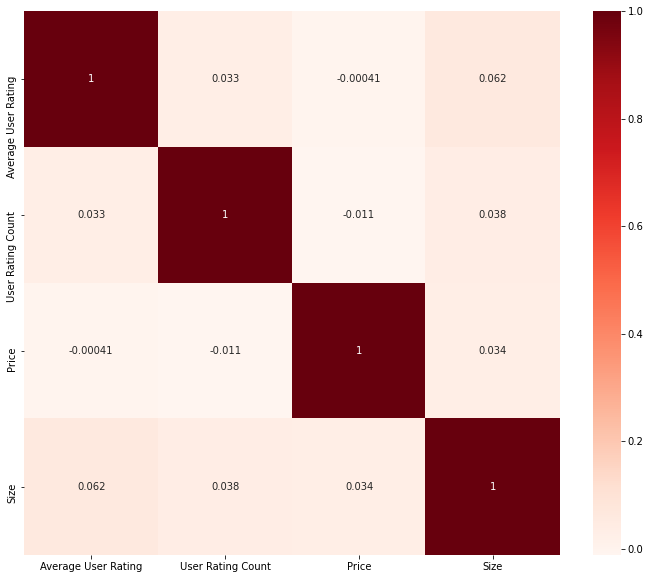

In [29]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

C:\tools\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\tools\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


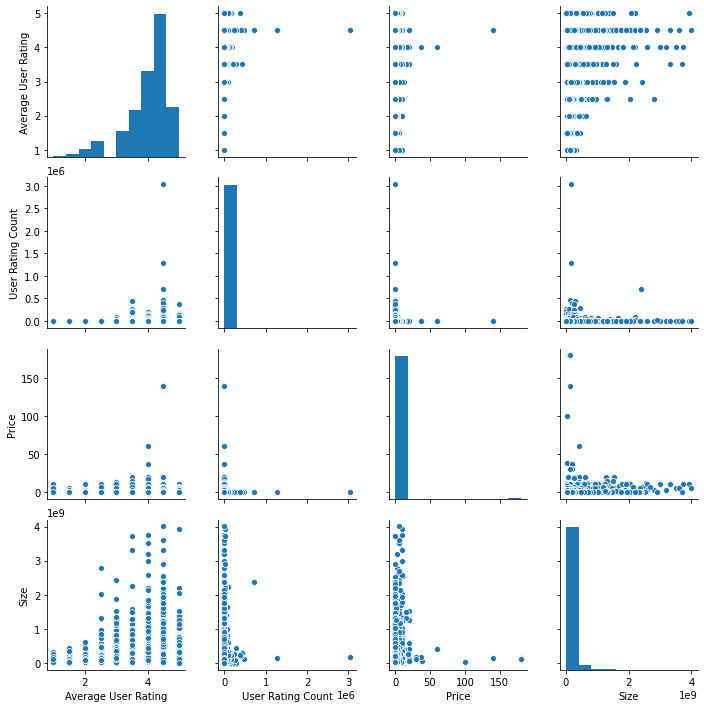

In [30]:
sns.pairplot(df)

Con la visualización que tenemos de estas correlaciones, podemos ver que existe una relación proporcional entre el tamaño de la aplicación y la calificación promedio de la aplicación.

## Analisis de los generos contra la calificación promedio de las aplicaciones

In [31]:
pd.crosstab(index=df['Genreslist'],
            columns=df['Average User Rating'], margins=True)

Average User Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
Genreslist,,,,,,,,,,
Action,1,3,10,13,19,37,93,172,48,396
Adventure,0,1,1,7,7,13,34,65,11,139
Business,0,0,1,1,0,2,1,1,0,6
Casino,0,0,0,0,0,0,3,2,1,6
Casual,1,0,3,6,15,20,41,81,45,212
Education,0,0,3,4,9,15,36,51,16,134
Entertainment,3,11,35,72,85,187,339,516,160,1408
Family,0,1,3,4,7,13,28,30,16,102
Finance,0,0,1,0,2,2,0,9,2,16


In [32]:
pd.crosstab(index=df['Genreslist'], columns=df['Average User Rating'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Average User Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
Genreslist,,,,,,,,,,
Action,0.005880,0.017640,0.058799,0.076439,0.111719,0.217557,0.546834,1.011348,0.282237,2.328453
Adventure,0.000000,0.005880,0.005880,0.041160,0.041160,0.076439,0.199918,0.382196,0.064679,0.817311
Business,0.000000,0.000000,0.005880,0.005880,0.000000,0.011760,0.005880,0.005880,0.000000,0.035280
Casino,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017640,0.011760,0.005880,0.035280
Casual,0.005880,0.000000,0.017640,0.035280,0.088199,0.117599,0.241077,0.476274,0.264597,1.246546
Education,0.000000,0.000000,0.017640,0.023520,0.052919,0.088199,0.211678,0.299877,0.094079,0.787911
Entertainment,0.017640,0.064679,0.205798,0.423355,0.499794,1.099547,1.993297,3.034045,0.940789,8.278944
Family,0.000000,0.005880,0.017640,0.023520,0.041160,0.076439,0.164638,0.176398,0.094079,0.599753
Finance,0.000000,0.000000,0.005880,0.000000,0.011760,0.011760,0.000000,0.052919,0.011760,0.094079


El mayor auge se encuentra en la,calificación 4.5 donde el mayor número de generos en esa calificación es estrategia. Por lo que podemos decir que un factor para tener una calificaión alta es que sea un juego de estrategia ya que también al analizar la calificacion de 5 igual los juegos de estrategia son los que mas reciben esta calificación.
Una vez que sabemos esto podemos relacionar que es por esto que el genero mas repetido es estrategia.

## Analisis de ultima actualización de las apps

In [33]:
df['O Date'] = pd.to_datetime(df['Original Release Date'])
df['U Date'] = pd.to_datetime(df['Current Version Release Date'])

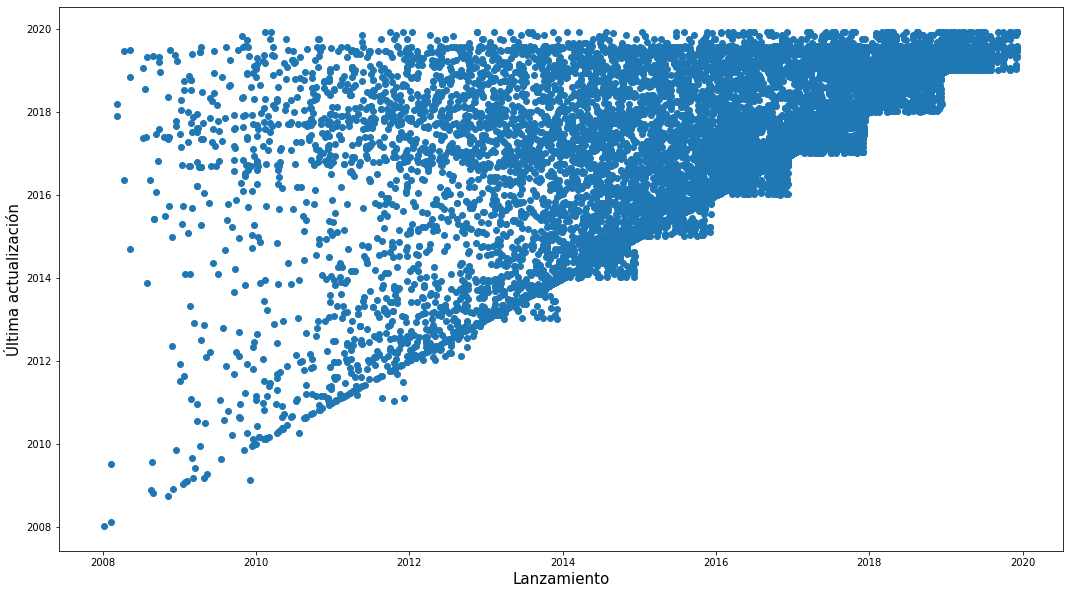

In [34]:
x = df['O Date']
y = df['U Date']
plt.plot(x, y, 'o')
plt.xlabel('Lanzamiento', fontsize = 15)
plt.ylabel('Última actualización', fontsize = 15)
plt.show()

Por la linea marcada podemos concluir que las aplicaciones una vez que son lanzadas tienen pocas actualizaciones después. Podriamos decir que la mayoria tienen actualizaciones recientes por todos los puntos que se ven por arriba de la diagonal.

## Relación entre la calificación y la ultima actualización de la aplicación

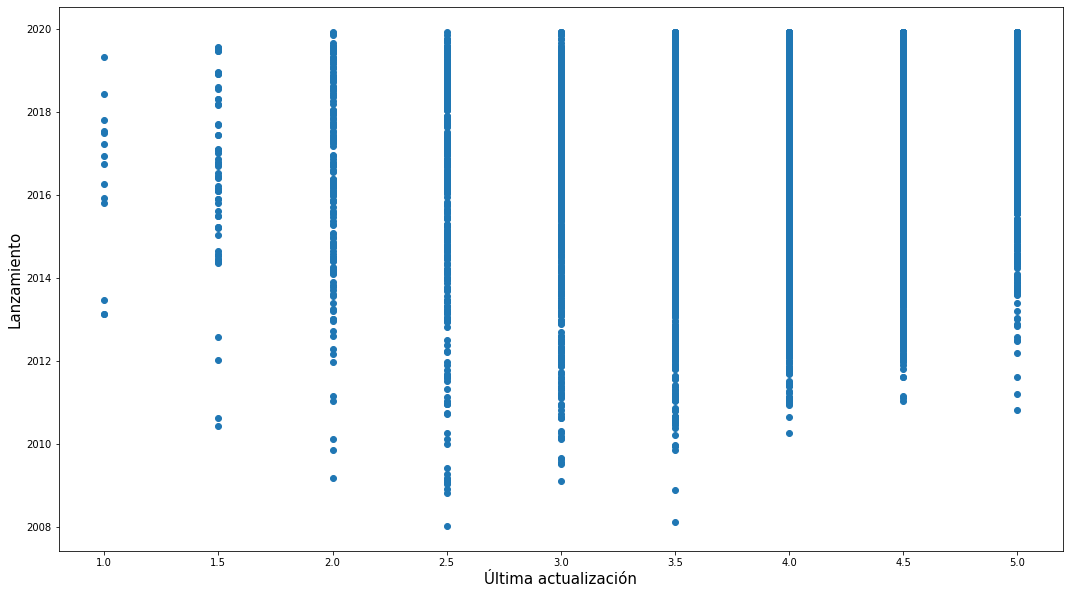

In [35]:
x = df['Average User Rating']
y = df['U Date']
plt.plot(x, y, 'o')
plt.ylabel('Lanzamiento', fontsize = 15)
plt.xlabel('Última actualización', fontsize = 15)
plt.show()

Si vemos en que momento se deja de ver espacios en la calificación 4 es aproximadamente en el año 2012, por lo que la ultima actualización no necesariamente influye en la calificación recibida.

## Relación entre el tamaño de la aplicación y la calificación recibida

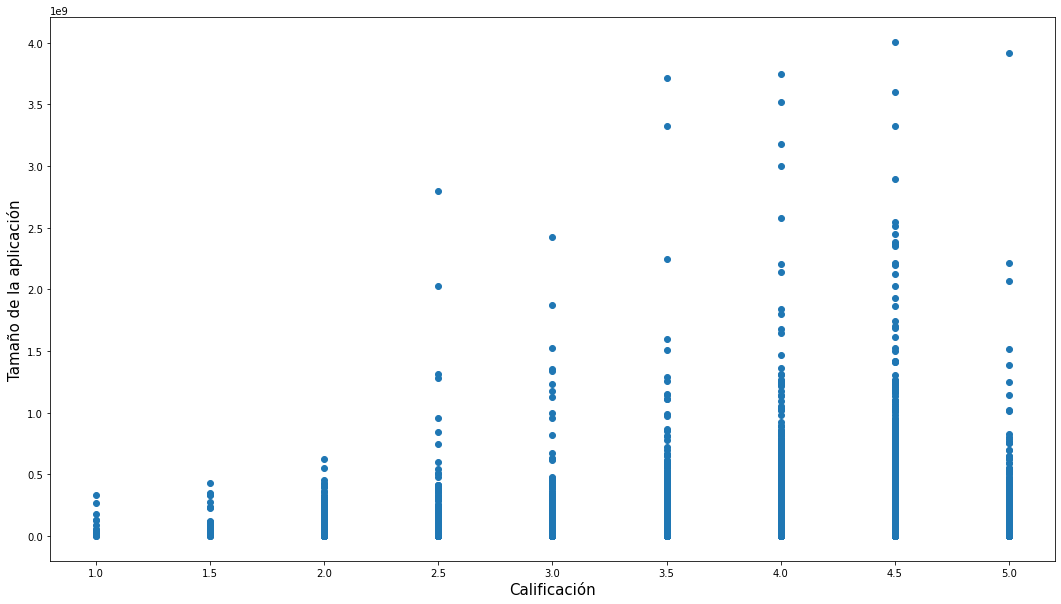

In [36]:
x = df['Average User Rating']
y = df['Size']
plt.plot(x, y, 'o')
plt.xlabel('Calificación', fontsize = 15)
plt.ylabel('Tamaño de la aplicación', fontsize = 15)
plt.show()

Podemos ver que para calificaciones altas(digamos a partir de 3.5) el tamaño de la aplicació no afecta mucho, pero en calificaciones bajas podemos notar que un factor si es el tamaño pequeño de la app.

## Relación entre la ultima actualización y el tamaño de la aplicación

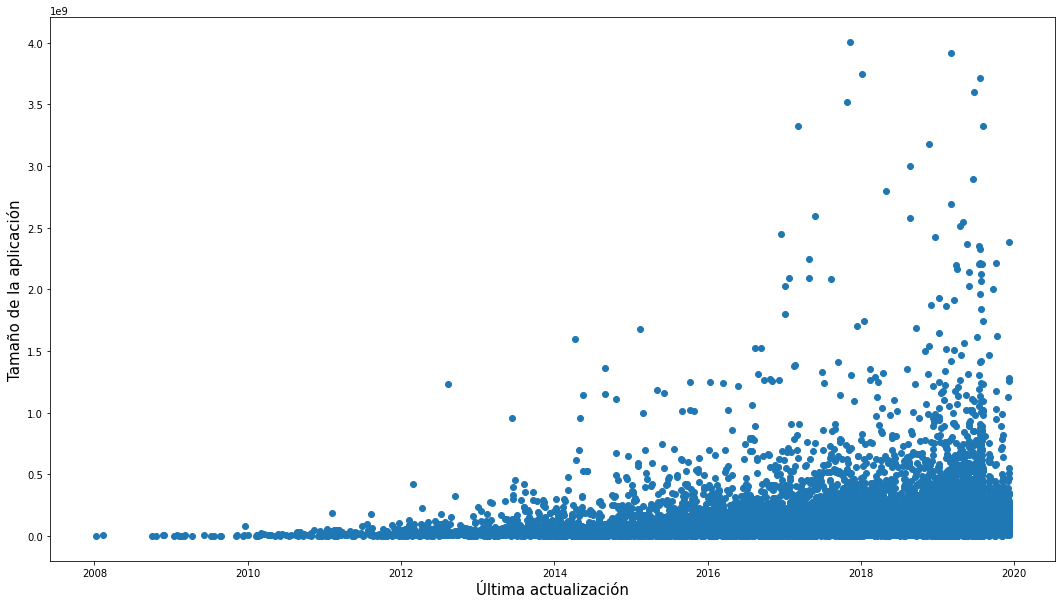

In [37]:
y = df['Size']
x = df['U Date']
plt.plot(x, y, 'o')
plt.ylabel('Tamaño de la aplicación', fontsize = 15)
plt.xlabel('Última actualización', fontsize = 15)
plt.show()

Se puede ver una muy ligera tendencia a subir el tamaño de la aplicación si la aplicación fue actualizada en años mas recientes.

## Analisis de calificación segun el precio de la aplicación

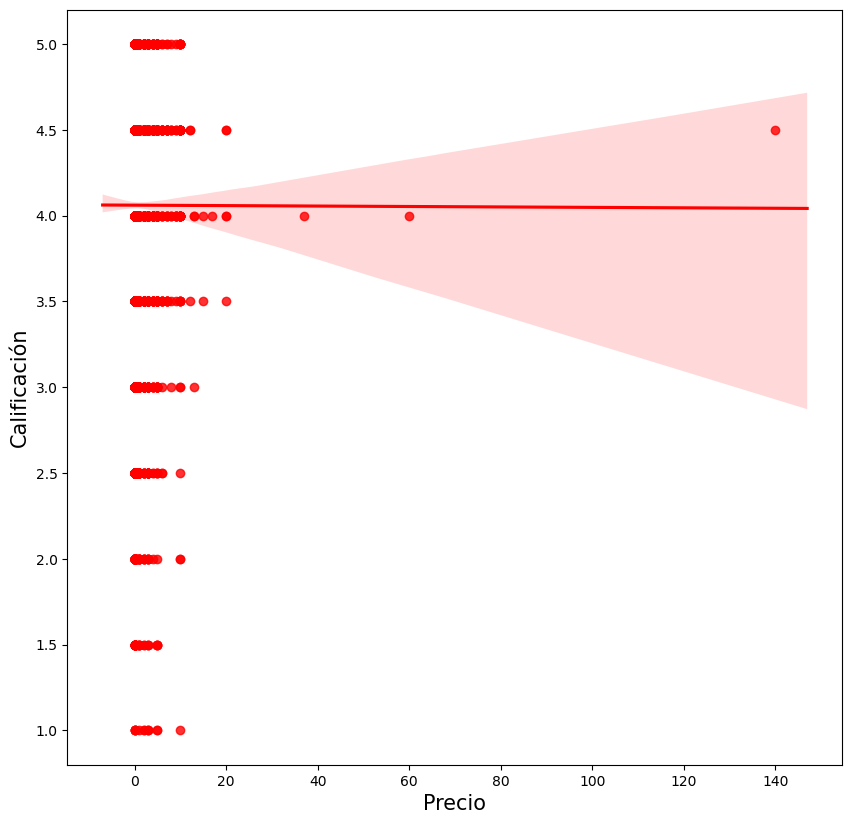

In [38]:
plt.figure(figsize=(10,10), dpi= 100)
ax = sns.regplot(data=df, x='Price', y='Average User Rating', color = 'red')
ax.set_ylabel('Calificación', fontsize = 15)
ax.set_xlabel('Precio', fontsize = 15)
plt.show()

El precio de la aplicación no se ve que afecte la calificación de la aplicación.

# Ahora veamos las puntuaciones si ordenamos el dataframe segun diferentes columnas

## Por User Rating Count

In [39]:
pt_acum = df.sort_values('User Rating Count', ascending=False)[['Name', 'User Rating Count', 'Average User Rating']]
pt_acum.head(30)

,Name,User Rating Count,Average User Rating
1378,Clash of Clans,3032734.0,4.5
7187,Clash Royale,1277095.0,4.5
13414,PUBG MOBILE,711409.0,4.5
1921,Plants vs. Zombies\u2122 2,469562.0,4.5
8139,Pok\xe9mon GO,439776.0,3.5
2410,Boom Beach,400787.0,4.5
12473,"Cash, Inc. Fame & Fortune Game",374772.0,5.0
8632,Idle Miner Tycoon: Cash Empire,283035.0,4.5
38,TapDefense,273687.0,3.5
3550,Star Wars\u2122: Commander,259030.0,4.5


In [40]:
pt_acum.tail(30)

,Name,User Rating Count,Average User Rating
16976,Pirates Attack,NaN,NaN
16977,Biz (The Corporate Game),NaN,NaN
16978,Magic Puzzle Box: 3 in 1,NaN,NaN
16979,Color Match Puzzle!,NaN,NaN
16980,Block Soldier Sniper,NaN,NaN
16981,Alien Technology War,NaN,NaN
16982,Gen e-Ric Space Shooter,NaN,NaN
16983,MAGICPresentSiberiaFrozenFront,NaN,NaN
16984,Window cleaner,NaN,NaN
16985,Bing Bang Go! Tic Tac Toe,NaN,NaN


En general las apps que más reciben calificaciones tienen buena puntuación, siendo la mas baja 3.5 en esta visualización.

## Por precio

In [41]:
precio = df.sort_values('Price', ascending=False)[['Name', 'Price', 'Average User Rating']]
precio.head(30)

,Name,Price,Average User Rating
8807,"Cat Simulator: Cute Pet 3D Full - Be a kitten,...",179.99,NaN
8600,Wild Falcon Survival Simulator 3D Full,179.99,NaN
9219,Lion Simulator: Wild African Animal Full,179.99,NaN
8281,Sea Turtle Simulator 3D Full - Ocean Adventure,179.99,NaN
8177,Wild Horse 3D Simulator Full,179.99,NaN
9724,Wild Snow Leopard: Animal Simulator Full,179.99,NaN
9005,African Cheetah: Wild Animal Simulator 3D Full,179.99,NaN
9159,Black Wild Panther Simulator 3D Full - Be a wi...,179.99,NaN
9025,Big Blue Whale Survival 3D Full - Try whale si...,179.99,NaN
9023,Fantasy Dragon Simulator 3D Full,179.99,NaN


In [42]:
precio.tail(30)

,Name,Price,Average User Rating
6333,GC: Territory Wars,0.0,4.0
6334,Bomber Troll Online,0.0,NaN
6335,Time Clickers,0.0,4.0
6336,Divide & Rule - PvP # 1 strategy puzzle game,0.0,NaN
6337,Fieldrunners Attack!,0.0,4.0
17006,The Three Kingdoms :Bomb,0.0,NaN
8341,Germiz,NaN,NaN
15216,Gears POP!,NaN,NaN
16104,State of Survival,NaN,NaN
16158,LEAGUE OF WONDERLAND,NaN,NaN


El precio no es un factor para saber si una aplicación tiene un puntaje alto o bajo, ya que tanto aplicaciones muy caras como gratis pueden no recibir una calificación.

## Por el tamaño de la aplicación

In [43]:
tam = df.sort_values('Size', ascending=False)[['Name', 'Size', 'Average User Rating']]
tam.head(30)

,Name,Size,Average User Rating
11957,ROME: Total War - Alexander,4.005591e+09,4.5
8398,ROME: Total War,3.916692e+09,5.0
2147,"""Baldur's Gate II: EE""",3.747743e+09,4.0
11724,"""Sid Meier's Civilization\xae VI""",3.716898e+09,3.5
10468,ROME: Total War - BI,3.599436e+09,4.5
3905,XCOM\xae: Enemy Within,3.518278e+09,4.0
15812,Shieldwall Chronicles,3.323805e+09,3.5
8416,Banner Saga 2,3.321083e+09,4.5
7255,Mission 1545,3.181755e+09,4.0
4425,Icewind Dale,2.996021e+09,4.0


In [44]:
tam.tail(30)

,Name,Size,Average User Rating
15604,Points Destroyed,698368.0,NaN
16762,CW_Fliporama,691200.0,NaN
1066,Taipan Retro,681885.0,4.5
1014,Game of Life Multiplayer,679936.0,NaN
2,Morocco,674816.0,3.0
7030,QuizApp,646144.0,NaN
2100,Hex for iPad,612352.0,NaN
502,Kafka,598016.0,NaN
4240,4096 slider puzzle - match adjacent numbers to...,585728.0,NaN
3492,Whacka: Dot Whackin Game,577536.0,5.0


Es mas probable que aplicaciones de mayor tamaño reciban una calificación.

In [45]:
cal = df.sort_values('Average User Rating', ascending=False)[['Name', 'Size', 'Price','Average User Rating', 'User Rating Count']]
cal.head(30)

,Name,Size,Price,Average User Rating,User Rating Count
16993,Agadmator Chess Clock,8845312.0,0.00,5.0,33.0
2733,Optical Inquisitor 17+,70558720.0,0.99,5.0,12416.0
12034,Watermelon Evolution Food Clicker,188539904.0,0.00,5.0,78.0
2730,Rush for gold: Alaska,246345728.0,0.00,5.0,172.0
12051,"""Jean's Sundaeria : Tap Dash""",44268544.0,0.00,5.0,8.0
12055,Cinco Paus,27311104.0,4.99,5.0,52.0
12070,Tank Raid Online,128904192.0,0.00,5.0,76.0
2732,Rush for gold: Alaska (full),246358016.0,2.99,5.0,42.0
12078,Spinners!,15496192.0,0.00,5.0,11.0
6442,Dodge It! - Move Your Finger & Evade The Blades,25075712.0,0.00,5.0,10.0


In [46]:
df['Average User Rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0        4.0
1        3.5
2        3.0
3        3.5
4        3.5
        ... 
17002    NaN
17003    NaN
17004    NaN
17005    NaN
17006    NaN
Name: Average User Rating, Length: 17007, dtype: float64>

No pudimos obtener una conclusión de las puntuaciones más altas ya que muchas de ellas tienen pocas calificaciones acumuladas.